In [1]:
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math

In [2]:
def district_map(arr, color='Oranges'):
    fig, ax = plt.subplots()

    m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)

    m.drawmapboundary(fill_color='#46bcec')

    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')

    m.drawcoastlines()

    m.readshapefile('./district/district', 'india')

    rate_arr = []
    for ds in m.india_info:
        d = ds['censuscode']
        rate = 0
        for x in arr:
            if x[0] == d:
                rate = x[1]
                break
        rate_arr.append(rate)

    df_poly = pd.DataFrame({
            'shapes': [Polygon(np.array(shape), True) for shape in m.india],
            'censuscode': [area['censuscode'] for area in m.india_info],
            'rate_arr' : rate_arr
        })

    shapes = [Polygon(np.array(shape), True) for shape in m.india]

    cmap = plt.get_cmap(color)   
    pc = PatchCollection(shapes, zorder=2)

    norm = Normalize()

    pc.set_facecolor(cmap(norm(df_poly['rate_arr'].fillna(0).values)))
    ax.add_collection(pc)
 

    plt.rcParams['figure.figsize'] = 150,150
    plt.rcParams.update({'font.size': 20})
    plt.show()
    

In [13]:
def state_map(arr, color='Oranges'):
    
    fig, ax = plt.subplots()

    m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)

    m.drawmapboundary(fill_color='#46bcec')

    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')

    m.drawcoastlines()
    m.readshapefile('./state/state', 'INDIA')

    lit_rate = []
   

    for state_info in m.INDIA_info:
        state = state_info['ST_NAME'].upper()
        rate = 0

        for x in state_arr:
            if x[0] == state:
                rate = x[1]
                break
        lit_rate.append(rate)            

    df_poly = pd.DataFrame({
            'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
            'area': [area['ST_NAME'] for area in m.INDIA_info],
            'lit_rate' : lit_rate
        })

    shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
   
    cmap = plt.get_cmap(color)   
    pc = PatchCollection(shapes, zorder=2)

    norm = Normalize()
    pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
    ax.add_collection(pc)

    mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
    mapper.set_array(lit_rate)
    plt.colorbar(mapper, shrink=0.4)

    plt.rcParams['figure.figsize'] = (15,15)
    plt.rcParams.update({'font.size': 20})
    plt.show()

In [7]:
dist_arr = [(1, 98.0), (2, 99.1), (3, 99.2), (4, 98.2), (5, 86.7), (6, 83.9), (7, 95.2), (8, 98.5), (9, 99.7), (10, 99.5), (11, 99.6), (12, 99.4), (13, 97.1), (14, 97.4), (15, 96.8), (16, 84.7), (17, 88.8), (18, 89.4), (19, 87.1), (20, 83.8), (21, 99.8), (22, 99.2), (23, 98.7), (24, 99.9), (25, 99.7), (26, 98.9), (27, 99.0), (28, 98.8), (29, 98.3), (30, 99.6), (31, 99.1), (32, 98.9), (33, 98.9), (34, 99.7), (35, 98.6), (36, 98.6), (37, 98.5), (38, 98.9), (39, 99.0), (40, 97.9), (41, 98.6), (42, 98.6), (43, 98.9), (44, 99.1), (45, 98.0), (46, 98.7), (47, 96.1), (48, 98.1), (49, 99.5), (50, 98.8), (51, 97.7), (52, 98.7), (53, 95.6), (54, 97.8), (56, 93.4), (57, 85.6), (58, 87.0), (59, 97.3), (60, 99.1), (61, 95.9), (62, 94.6), (63, 94.8), (64, 85.9), (65, 95.4), (66, 95.1), (67, 96.3), (68, 96.5), (69, 98.3), (70, 96.0), (71, 96.7), (72, 95.1), (73, 89.6), (74, 94.4), (75, 98.2), (76, 97.8), (77, 94.6), (78, 96.7), (79, 88.3), (80, 91.4), (81, 91.1), (82, 98.6), (83, 93.1), (84, 89.9), (85, 97.1), (86, 94.8), (87, 67.5), (88, 91.8), (89, 83.0), (90, 98.1), (91, 97.9), (92, 98.8), (93, 96.9), (94, 99.3), (95, 99.0), (96, 99.0), (97, 98.8), (98, 98.3), (99, 97.3), (100, 97.0), (101, 90.3), (102, 92.5), (103, 96.9), (104, 95.2), (105, 91.7), (106, 85.6), (107, 87.4), (108, 88.9), (109, 92.9), (110, 96.6), (111, 94.0), (112, 88.9), (113, 88.6), (114, 90.7), (115, 87.1), (116, 99.2), (117, 98.0), (118, 97.6), (119, 96.9), (120, 96.4), (121, 96.8), (122, 96.1), (123, 94.8), (124, 92.3), (125, 79.3), (126, 99.0), (127, 98.0), (128, 97.7), (129, 96.6), (130, 88.8), (131, 95.2), (132, 98.2), (133, 93.8), (134, 96.1), (135, 96.4), (136, 98.2), (137, 95.9), (138, 97.0), (139, 98.2), (140, 98.8), (141, 99.4), (142, 97.0), (143, 93.8), (144, 95.4), (145, 95.9), (146, 94.8), (147, 95.4), (148, 96.4), (149, 96.8), (150, 95.1), (151, 83.3), (152, 92.0), (153, 83.9), (154, 90.2), (155, 85.4), (156, 93.5), (157, 95.6), (158, 84.2), (159, 93.2), (160, 94.5), (161, 94.3), (162, 84.4), (163, 93.0), (164, 95.9), (165, 84.6), (166, 86.2), (167, 89.9), (168, 89.7), (169, 93.4), (170, 94.5), (171, 77.6), (172, 96.1), (173, 95.0), (174, 92.8), (175, 98.4), (176, 96.9), (177, 92.7), (178, 91.1), (179, 93.0), (180, 78.7), (181, 74.7), (182, 78.2), (183, 90.4), (184, 96.0), (185, 96.5), (186, 87.9), (187, 90.0), (188, 97.2), (189, 97.8), (190, 98.6), (191, 96.3), (192, 95.2), (193, 92.9), (194, 93.2), (195, 98.3), (196, 99.1), (197, 97.3), (198, 97.0), (199, 98.1), (200, 98.2), (201, 96.0), (202, 97.4), (203, 89.9), (204, 91.7), (205, 90.4), (206, 95.4), (207, 80.0), (208, 98.2), (209, 95.3), (210, 95.9), (211, 95.9), (212, 97.9), (213, 96.3), (214, 93.7), (215, 91.6), (216, 94.7), (217, 91.2), (218, 96.2), (219, 80.4), (220, 95.5), (221, 87.6), (222, 98.3), (223, 97.2), (224, 89.7), (225, 89.7), (226, 95.7), (227, 98.9), (228, 94.4), (229, 97.8), (230, 98.7), (231, 92.0), (232, 98.4), (233, 96.5), (234, 99.2), (235, 93.7), (236, 98.6), (237, 98.0), (238, 92.8), (239, 97.2), (240, 92.7), (241, 99.3), (242, 99.9), (243, 99.4), (244, 99.7), (245, 99.5), (246, 99.2), (247, 99.7), (248, 99.1), (249, 99.3), (250, 98.7), (251, 99.5), (252, 98.6), (253, 99.6), (254, 99.2), (255, 99.6), (256, 99.2), (257, 99.0), (258, 99.0), (259, 99.8), (260, 98.6), (261, 98.6), (262, 99.5), (263, 99.6), (264, 99.6), (265, 99.8), (266, 99.5), (267, 99.5), (268, 99.7), (269, 99.3), (270, 99.3), (271, 99.8), (272, 98.5), (273, 99.6), (274, 100.0), (275, 99.8), (276, 99.8), (277, 99.5), (278, 99.7), (279, 98.0), (280, 99.3), (281, 97.8), (282, 99.3), (283, 98.8), (284, 99.0), (285, 99.5), (286, 99.6), (287, 99.1), (288, 99.8), (289, 99.2), (290, 98.6), (291, 99.5), (292, 99.2), (293, 99.3), (294, 98.7), (295, 98.9), (296, 99.5), (297, 97.8), (298, 99.3), (299, 99.4), (300, 99.6), (301, 98.8), (302, 99.6), (303, 99.5), (304, 99.3), (305, 99.8), (306, 99.7), (307, 99.9), (308, 99.2), (309, 99.9), (310, 99.8), (311, 99.9), (312, 99.8), (313, 100.0), (314, 99.8), (315, 100.0), (316, 99.9), (317, 99.6), (318, 99.8), (319, 99.9), (320, 98.4), (321, 98.9), (322, 99.9), (323, 99.7), (324, 99.2), (325, 99.3), (326, 99.7), (327, 98.6), (328, 92.1), (329, 89.4), (330, 97.3), (331, 92.1), (332, 93.6), (333, 93.5), (334, 94.2), (335, 97.3), (336, 95.8), (337, 97.3), (338, 98.8), (339, 88.8), (340, 93.9), (341, 97.5), (342, 98.5), (343, 94.6), (344, 91.8), (345, 86.6), (346, 93.2), (347, 98.2), (348, 95.6), (349, 98.9), (350, 96.9), (351, 97.2), (352, 98.0), (353, 97.1), (354, 98.4), (355, 98.8), (356, 97.9), (357, 99.0), (358, 94.8), (359, 97.8), (360, 98.3), (361, 97.6), (362, 97.0), (363, 97.3), (364, 98.4), (365, 97.7), (366, 98.6), (367, 99.6), (368, 99.5), (369, 92.2), (370, 99.1), (371, 98.7), (372, 96.9), (373, 93.5), (374, 98.2), (375, 92.6), (376, 78.8), (377, 80.2), (378, 96.3), (379, 95.5), (380, 99.2), (381, 95.1), (382, 99.3), (383, 98.7), (384, 89.5), (385, 91.2), (386, 94.5), (387, 99.7), (388, 91.3), (389, 76.8), (390, 95.3), (391, 90.6), (392, 99.4), (393, 98.7), (394, 98.6), (395, 96.2), (396, 80.8), (397, 87.6), (398, 90.0), (399, 91.4), (400, 98.8), (401, 99.3), (402, 99.3), (403, 98.6), (404, 99.4), (405, 99.0), (406, 99.3), (407, 97.0), (408, 98.8), (409, 99.4), (410, 99.3), (411, 99.1), (412, 99.6), (413, 99.2), (414, 98.5), (415, 99.7), (416, 99.6), (417, 99.7), (418, 97.3), (419, 86.7), (420, 93.8), (421, 97.6), (422, 85.3), (423, 94.5), (424, 72.3), (425, 70.5), (426, 86.3), (427, 91.6), (428, 88.7), (429, 92.4), (430, 89.6), (431, 89.1), (432, 98.4), (433, 98.1), (434, 95.3), (435, 98.2), (436, 96.5), (437, 99.1), (438, 98.2), (439, 99.8), (440, 99.4), (441, 97.6), (442, 96.0), (443, 93.7), (444, 98.3), (445, 97.8), (446, 92.2), (447, 95.9), (448, 99.2), (449, 99.4), (450, 79.3), (451, 91.2), (452, 96.0), (453, 78.9), (454, 82.4), (455, 95.8), (456, 92.9), (457, 95.7), (458, 93.2), (459, 90.6), (460, 89.8), (461, 93.2), (462, 91.0), (463, 89.5), (464, 93.6), (465, 93.9), (466, 98.2), (467, 99.1), (468, 96.2), (469, 97.7), (470, 97.5), (471, 95.6), (472, 92.1), (473, 96.8), (474, 96.4), (475, 94.1), (476, 98.4), (477, 97.6), (478, 98.8), (479, 96.8), (480, 94.0), (481, 87.2), (482, 86.6), (483, 97.4), (484, 94.5), (485, 93.5), (486, 96.6), (487, 98.6), (488, 98.3), (489, 95.8), (490, 93.8), (491, 92.1), (492, 97.9), (493, 96.3), (494, 90.2), (495, 97.9), (497, 98.5), (498, 96.9), (499, 98.6), (500, 99.6), (501, 98.7), (502, 97.2), (503, 97.1), (504, 98.7), (505, 94.4), (506, 99.0), (507, 98.8), (508, 98.2), (509, 99.2), (510, 98.0), (511, 95.8), (512, 98.9), (513, 99.1), (514, 99.8), (515, 98.2), (516, 97.2), (517, 93.5), (518, 99.6), (519, 98.1), (520, 93.8), (521, 95.7), (522, 94.9), (523, 95.4), (524, 97.4), (525, 98.6), (526, 96.4), (527, 93.3), (528, 85.1), (529, 88.1), (530, 94.9), (531, 96.2), (532, 97.1), (533, 95.4), (534, 98.8), (535, 98.2), (536, 98.9), (537, 98.4), (538, 80.4), (539, 90.5), (540, 97.4), (541, 99.2), (542, 80.0), (543, 69.1), (544, 90.4), (545, 82.3), (546, 85.1), (547, 90.5), (548, 82.5), (549, 76.4), (550, 82.2), (551, 73.2), (552, 74.7), (553, 77.8), (554, 83.8), (555, 96.3), (556, 84.6), (557, 83.5), (558, 95.8), (559, 81.8), (560, 84.1), (561, 75.2), (562, 87.7), (563, 88.5), (564, 84.4), (565, 76.9), (566, 74.6), (567, 81.9), (568, 75.0), (569, 85.5), (570, 84.3), (571, 85.5), (572, 95.9), (573, 93.6), (574, 94.2), (575, 74.5), (576, 90.1), (577, 86.1), (578, 81.3), (579, 85.8), (580, 87.7), (581, 80.6), (582, 66.4), (583, 83.0), (584, 83.3), (585, 94.5), (586, 97.4), (588, 94.2), (589, 98.0), (590, 96.9), (591, 98.4), (592, 99.3), (593, 97.2), (594, 99.2), (595, 97.7), (596, 99.1), (597, 99.1), (598, 98.2), (599, 99.2), (600, 99.0), (601, 99.2), (602, 92.9), (603, 96.4), (604, 91.1), (605, 87.0), (606, 72.2), (607, 87.0), (608, 88.3), (609, 89.0), (610, 87.3), (611, 87.2), (612, 81.3), (613, 89.0), (614, 80.2), (615, 84.0), (616, 62.8), (617, 73.6), (618, 79.8), (619, 76.0), (620, 78.5), (621, 85.1), (622, 66.3), (623, 81.8), (624, 61.2), (625, 62.8), (626, 67.5), (627, 67.7), (628, 54.9), (629, 88.9), (630, 81.3), (631, 82.6), (632, 90.7), (633, 93.1), (634, 92.1), (635, 93.6), (636, 98.8), (637, 87.6), (638, 99.7), (639, 99.4), (640, 99.2)]

In [14]:
state_arr = [('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PUNJAB', 67.42929419668246), ('RAJASTHAN', 55.8368413272501), ('SIKKIM', 72.8740191654779), ('TAMIL NADU', 71.84981419193555), ('TRIPURA', 76.34312370148808), ('UTTAR PRADESH', 57.252497231890196), ('UTTARAKHAND', 68.22083873835896), ('WEST BENGAL', 67.41991702867722)]

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


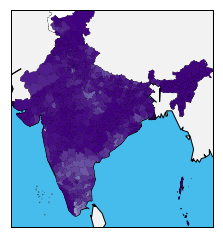

In [9]:
district_map(dist_arr, color='Purples')

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


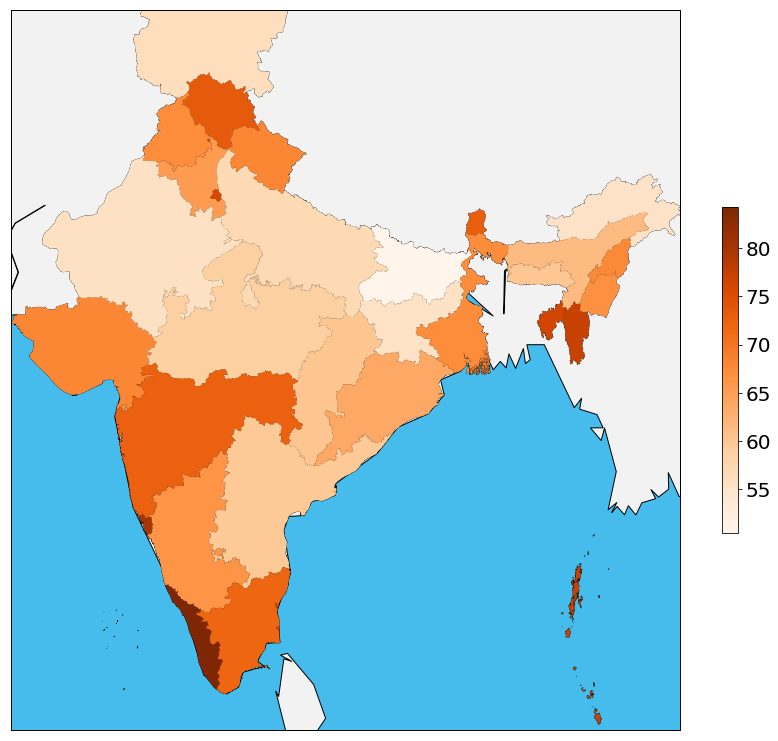

In [15]:
state_map(state_arr, color='Oranges')